In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

---

# Alles

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,cell_ontology_class,cell_ontology_id,cell_type1,cluster,dataset_name,lifestage,organ,organism,platform
ACTTAGCGTTTN,,,undifferentiated cells,0.0,Alles,embryo,Atlas,Drosophila melanogaster,Drop-seq
ATACACCCGCCC,,,undifferentiated cells,0.0,Alles,embryo,Atlas,Drosophila melanogaster,Drop-seq
TCGGCGATGTAT,,,undifferentiated cells,0.0,Alles,embryo,Atlas,Drosophila melanogaster,Drop-seq
GTTCGCCGTCGA,,,undifferentiated cells,0.0,Alles,embryo,Atlas,Drosophila melanogaster,Drop-seq
CTAATCGCTAGT,,,undifferentiated cells,0.0,Alles,embryo,Atlas,Drosophila melanogaster,Drop-seq


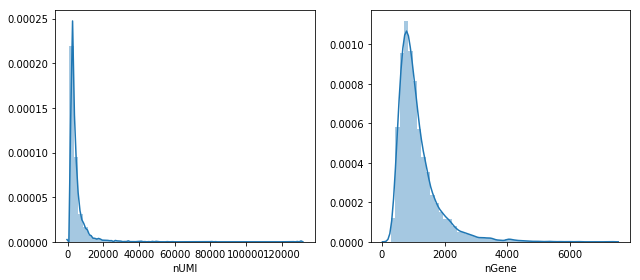

In [2]:
alles = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Alles/data.h5")
utils.peek(alles, "Alles")
alles = alles.normalize()
alles.obs.head()

In [3]:
alles_model = cb.directi.fit_DIRECTi(
    alles, alles.uns["seurat_genes"],
    **fixed_model_kwargs, h_dim=512,
    path="/tmp/cb/db/Alles/model_0"
)
alles.latent = alles_model.inference(alles)

[DIRECTi epoch 0] train=2.230, val=2.260, time elapsed=1.1s Best save...
[DIRECTi epoch 1] train=2.216, val=2.243, time elapsed=0.4s Best save...
[DIRECTi epoch 2] train=2.194, val=2.212, time elapsed=0.4s Best save...
[DIRECTi epoch 3] train=1.928, val=1.455, time elapsed=0.4s Best save...
[DIRECTi epoch 4] train=1.057, val=0.913, time elapsed=0.4s Best save...
[DIRECTi epoch 5] train=0.868, val=0.926, time elapsed=0.4s
[DIRECTi epoch 6] train=0.861, val=0.913, time elapsed=0.4s
[DIRECTi epoch 7] train=0.855, val=0.895, time elapsed=0.4s Best save...
[DIRECTi epoch 8] train=0.851, val=0.910, time elapsed=0.4s
[DIRECTi epoch 9] train=0.846, val=0.900, time elapsed=0.4s
[DIRECTi epoch 10] train=0.840, val=1.095, time elapsed=0.4s
[DIRECTi epoch 11] train=0.824, val=3.019, time elapsed=0.4s
[DIRECTi epoch 12] train=0.814, val=4.539, time elapsed=0.4s
[DIRECTi epoch 13] train=0.808, val=3.145, time elapsed=0.4s
[DIRECTi epoch 14] train=0.804, val=2.677, time elapsed=0.4s
[DIRECTi epoch 15

[  Info   ] Computing tSNE...


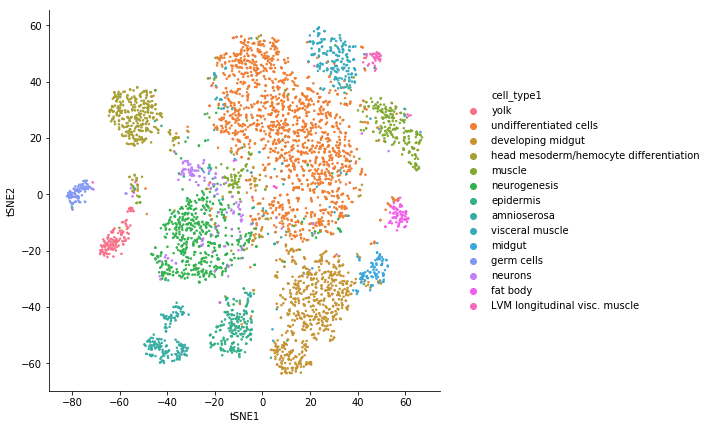

In [4]:
plot = alles.visualize_latent("cell_type1")
plot.get_figure().savefig("Alles/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


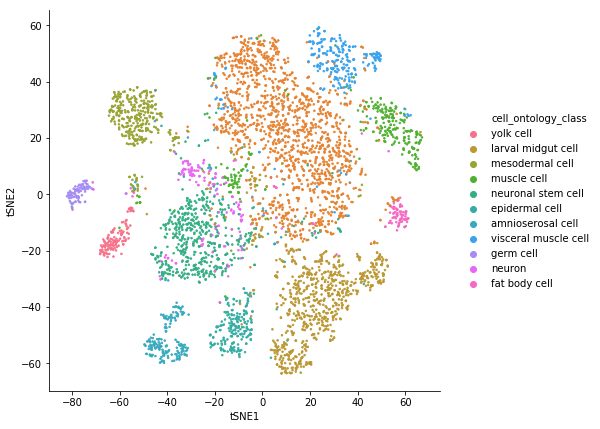

In [5]:
plot = alles.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Alles/cell_ontology_class.pdf", bbox_inches="tight")

In [6]:
%%capture capio
alles_models = [alles_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    alles_models.append(cb.directi.fit_DIRECTi(
        alles, alles.uns["seurat_genes"],
        **fixed_model_kwargs, h_dim=512,
        random_seed=i, path="/tmp/cb/db/Alles/model_%d" % i
    ))
alles_blast = cb.blast.BLAST(alles_models, alles, 
                                               keep_exprs=True).build_empirical()
alles_blast.save("Alles")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Alles/model_1/checkpoint-73
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Alles/model_2/checkpoint-68
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Alles/model_3/checkpoint-84


In [7]:
with open("Alles/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Alles/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [8]:
utils.self_projection(alles_blast, "Alles")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9114
Accuracy = 0.9536
